## Testing complex multi body class

In [1]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

#import WIPL_python_analysis.ComplexMultiBody.ComplexMultiBody as cmb
from ComplexMultiBody import ComplexMultiBody as cmb
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr


sys.path.append('./')

## Load distribution

In [2]:
distribution_df = pickle.load(open('test_cyclinder.pkl', 'rb'))

In [3]:
cmb_override = cmb(
    scatterer_dataset=xr.open_dataset('bioscatterer_database_v0.001.nc'),
    frequency=5.6,
    distribution_df=distribution_df,
    override= True
    )

In [4]:
cmb_override.calculate_resultant_voltages()

In [5]:
cmb_override._dual_pol_calcs_on_recieved_voltages()

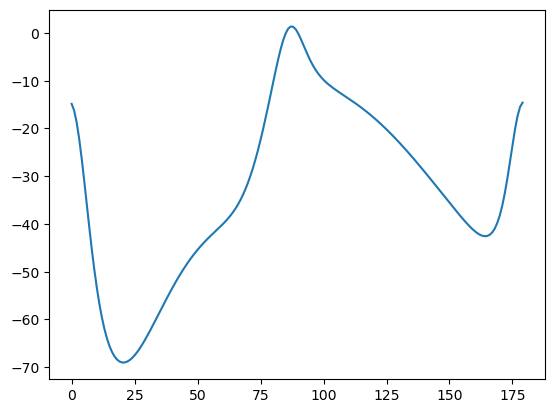

In [6]:
plt.plot(cmb_override.differential_phase)

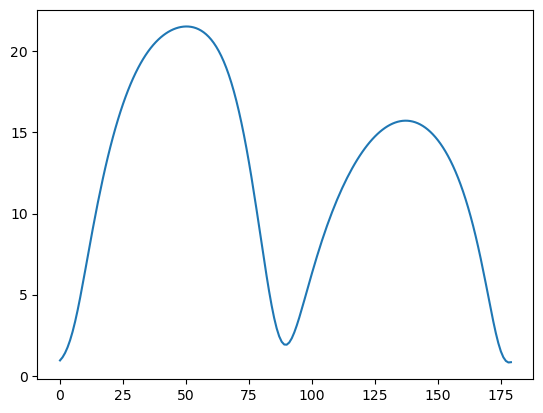

In [7]:
plt.plot(cmb_override.differential_reflectivity)

In [8]:
cmb_no_azimuth= cmb(
    scatterer_dataset=xr.open_dataset('bioscatterer_database_v0.001.nc'),
    frequency=5.6,
    distribution_df=distribution_df,
    ignore_heading = True
    )

In [9]:
cmb_no_azimuth.calculate_resultant_voltages()

In [10]:
cmb_no_azimuth._dual_pol_calcs_on_recieved_voltages()

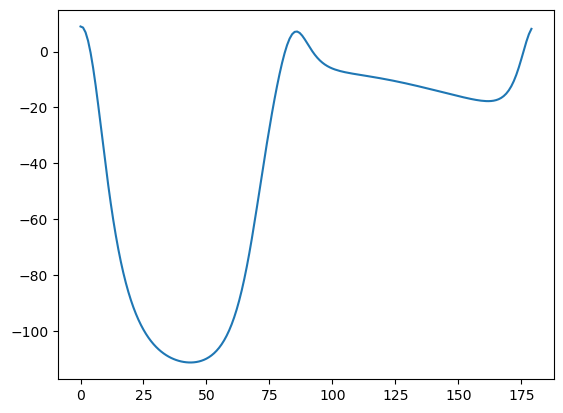

In [11]:
plt.plot(cmb_no_azimuth.differential_phase)

In [12]:
cmb_azimuthal_variation= cmb(
    scatterer_dataset=xr.open_dataset('bioscatterer_database_v0.001.nc'),
    frequency=5.6,
    distribution_df=distribution_df,
    )

In [13]:
cmb_azimuthal_variation.calculate_resultant_voltages()
cmb_azimuthal_variation._dual_pol_calcs_on_recieved_voltages()

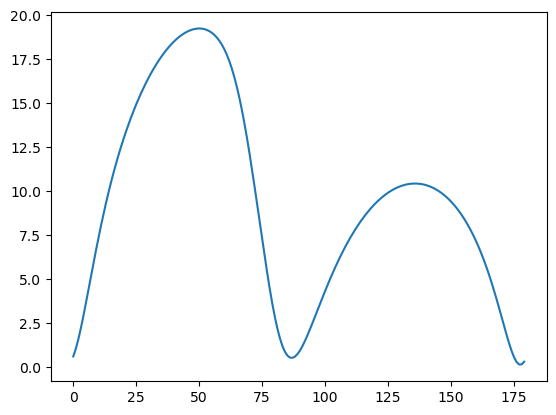

In [14]:
plt.plot(cmb_azimuthal_variation.differential_reflectivity)

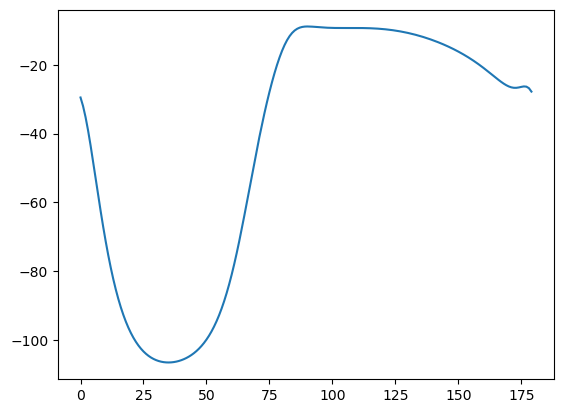

In [15]:
plt.plot(cmb_azimuthal_variation.differential_phase)

# Experimenting with a size distribution

In [16]:
cmb_70_30 = cmb(
    scatterer_dataset=xr.open_dataset('bioscatterer_database_v0.001.nc'),
    frequency=5.6,
    distribution_df=pickle.load(open('test_30_17_70_9.pkl', 'rb'))
    )

In [17]:
cmb_70_30.calculate_resultant_voltages()
cmb_70_30._dual_pol_calcs_on_recieved_voltages()

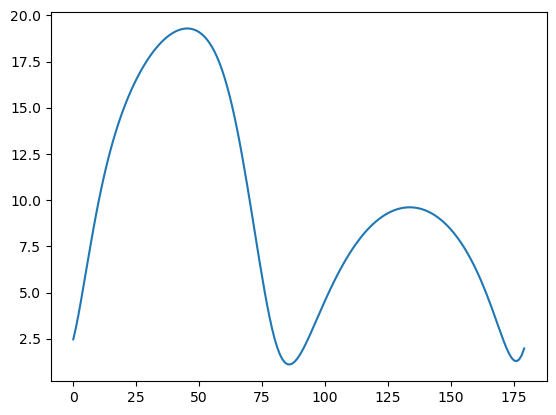

In [18]:
plt.plot(cmb_70_30.differential_reflectivity)

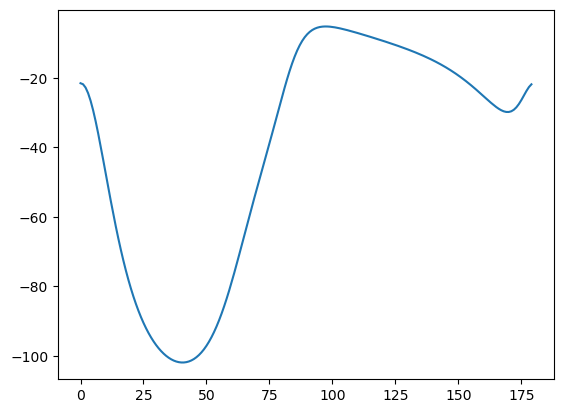

In [19]:
plt.plot(cmb_70_30.differential_phase)

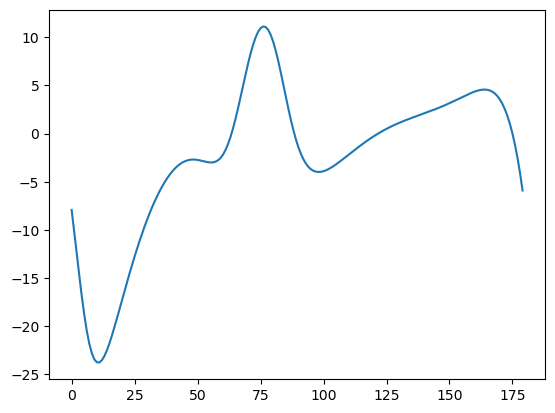

In [20]:
plt.plot(cmb_azimuthal_variation.differential_phase - cmb_70_30.differential_phase)

In [21]:
cmb_azimuthal_variation.write_to_file('azimuthal_variations.csv')